# HW_1: Кластеризация

Как узнать свою аудиторию? Построение различных вариантов кластеризаций и интерпретация результатов.

Цель:
На этот раз займемся классической задачкой - сегментация клиентов (в данном случае - банка). Крайне полезная операция, которая позволяет вам лучше познакомится со своей аудиторией, понять, на какие группы она делится и чем они характеризуются.


Описание/Пошаговая инструкция выполнения домашнего задания:\
**Часть 1. EDA и Preprocessing**
1.Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit;
2.Проведите EDA, чтобы познакомиться с признаками;
3.Преобразуйте все признаки в числовые подходящими методами;
4.Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации).

**Часть 2. Моделирование**
1.Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;
2.Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости.

**Часть 3. Интерпретация**
1.Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности?
2.Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import seaborn as sns
import matplotlib

#plt.rcParams["figure.figsize"] = [8, 8]

np.random.seed(10)

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
from sklearn.metrics import get_scorer
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import os

from sklearn import metrics

from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", UserWarning)

# Часть 1. EDA и Preprocessing

Загрузка - Статистики и Визуализация - Предобработка - Моделирование 

## 1.1. EDA

In [2]:
data = pd.read_csv('german_credit_data.csv', index_col=0)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## Описание Dataset

В этом наборе данных каждая запись представляет человека, который берет кредит в банке. Каждый человек классифицируется как хороший или плохой кредитный риск в соответствии с набором признаков.

1. Age
2. Sex (пол):'female' 'male' \
3. Job (Работа):\
    0 – неквалифицированный и иногородний, \
    1 – неквалифицированный и постоянный, \
    2 – квалифицированный, \
    3 – высококвалифицированный

4. Housing (Жилье):\
    'free' - бесплатное\
    'own' - собственное\
    'rent'- аренда\

5. Saving accounts (Сохранение счетов):\
Сберегательный вклад, предназначенный для непрерывного накопления средств. Особенностью данного вклада является то, что счёт можно пополнять достаточно мелкими суммами, к тому же возможно частичное изъятие средств\

    'little'– мало\
    'moderate' – умеренно\
    'quite rich'–довольно богато\
    'rich'– богато

6. Checking account (Текущий счет):\

Текущий счет — это депозитный счет — банковский счет, который вы можете использовать для хранения и снятия денег. Это позволяет вам получить доступ к своим средствам несколькими способами. Вы можете получить доступ к средствам, которые вы размещаете на своем счете, сняв наличные в банкомате или филиале, выписав чек, отправив электронный чек, настроив автоматический перевод или используя дебетовую карту . Этот тип счета обычно используется для повседневных расходов.

    'little' – мало\
    'moderate'– умеренно\
    'rich'– богато

7. Credit amount (Сумма кредита) - в нем. марках

8. Duration (Продолжительность) - в месяцах

9. Purpose (Назначение):\
    'business' – бизнес\
    'car' – автомобиль\
    'domestic appliances' –бытовая техника\
    'education' – образование\
    'furniture/equipment'– мебель/техника\
    'radio/TV' –радио/телевидение\
    'repairs' –ремонт\
    'vacation/others'–отдых/прочее

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


### Проверка на пропуски данных

In [4]:
# Вычисляем долю пропущенных значений для каждого столбца в DataFrame
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

Saving accounts     0.18
Checking account    0.39
dtype: float64

In [5]:
features_with_na=data.isna().sum()[data.isna().sum()>0] / data.shape[0]
list_to_drop=features_with_na[features_with_na>0.3].index.tolist()
list_to_drop

['Checking account']

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [8]:
# Пропущеннных значений нет

### Базовые статистики датасета

### Распределение числовых признаков

In [9]:
data.describe().round(2)

,Age,Job,Credit amount,Duration
count,522.00,522.00,522.00,522.00
mean,34.89,1.88,3278.75,21.34
std,11.79,0.68,2929.16,12.47
min,19.00,0.00,276.00,6.00
25%,26.00,2.00,1297.50,12.00
50%,31.50,2.00,2326.50,18.00
75%,41.00,2.00,3971.25,26.75
max,75.00,3.00,18424.00,72.00


In [10]:
print(data["Sex"])

1      female
3        male
4        male
7        male
9        male
        ...  
989      male
993      male
996      male
998      male
999      male
Name: Sex, Length: 522, dtype: object


In [11]:
# Количество женщин
(data["Sex"]=="female").sum()

168

In [12]:
# Количество мужчин
(data["Sex"]=="male").sum()

354

Мужчин в 2,1 раза больше, чем женщин.Это надо учитывать при анализе показателей.

In [13]:
columns_of_interest = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in data.columns[0:9]:
    if col in columns_of_interest:
        print(col, np.unique(data[col]))

Sex ['female' 'male']
Job [0 1 2 3]
Housing ['free' 'own' 'rent']
Saving accounts ['little' 'moderate' 'quite rich' 'rich']
Checking account ['little' 'moderate' 'rich']
Purpose ['business' 'car' 'domestic appliances' 'education' 'furniture/equipment'
 'radio/TV' 'repairs' 'vacation/others']


## Visualization - Выявление взаимосвязи

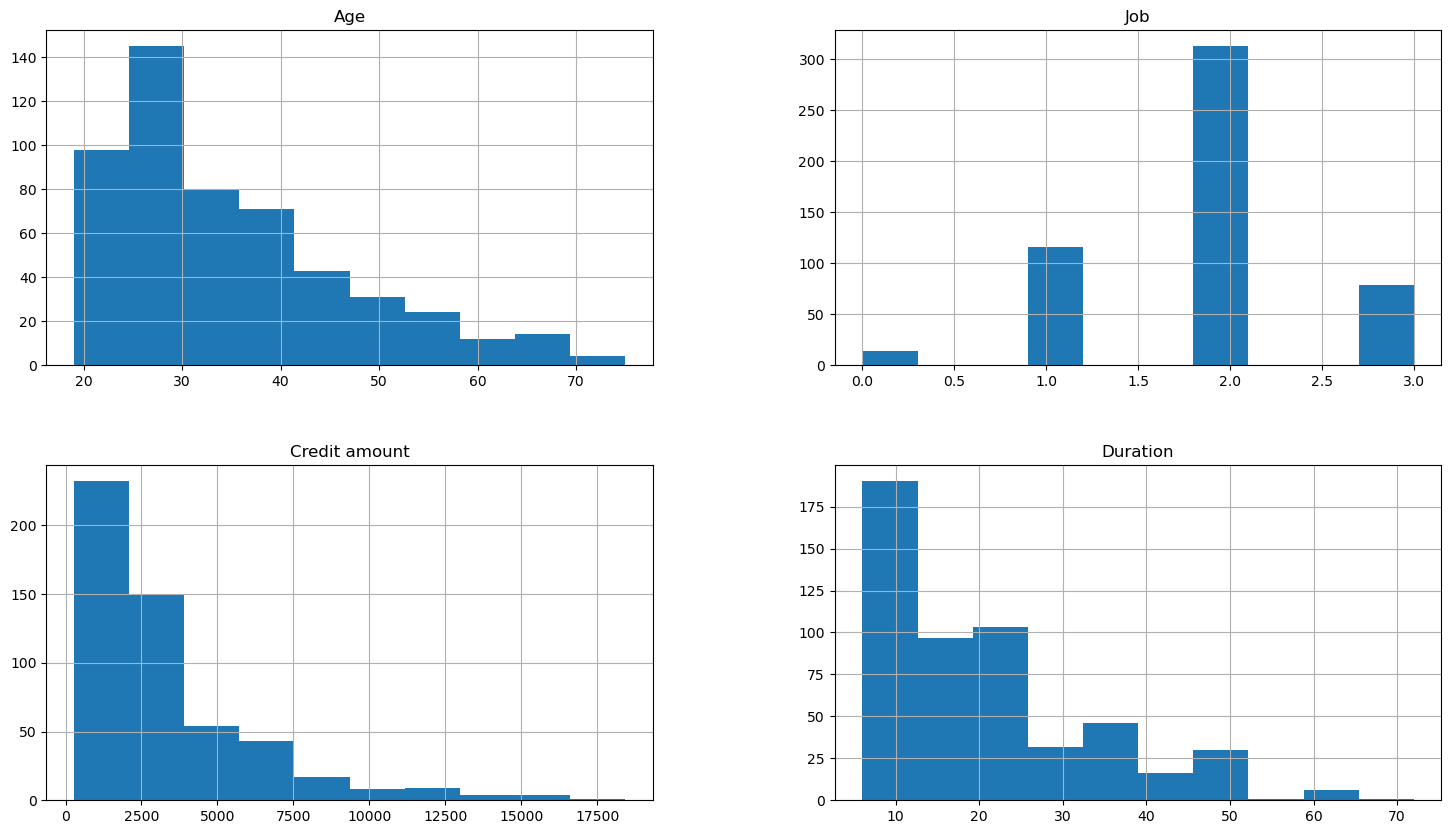

In [14]:
data.hist(figsize=(18, 10));

Из графиков видно, что у трех из четырех параметров (исключение Job) ненормальное распределение. 
Это надо учитывать при дальнейшем анализе. Например, использование метода 3(2) сигмы будет некорректно.

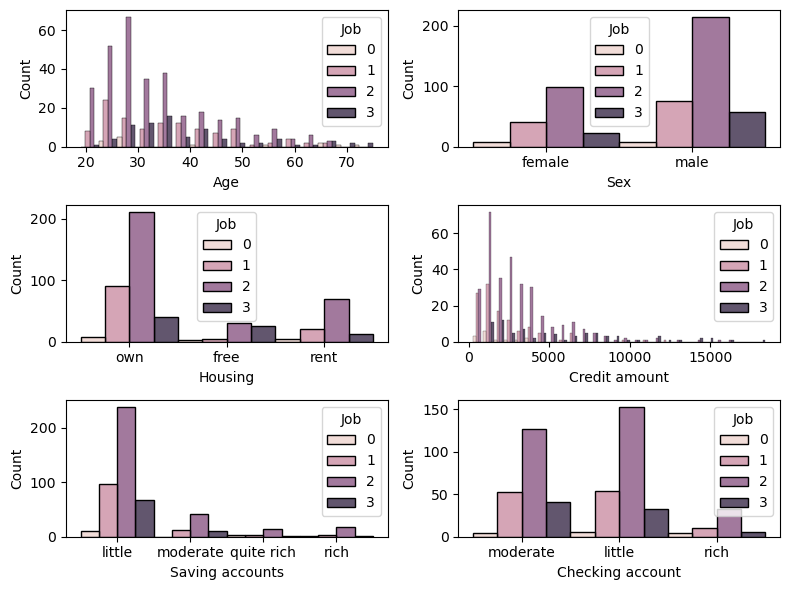

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(8, 6))

sns.histplot(data=data, x="Age", hue="Job", multiple="dodge", ax=axes[0, 0])

sns.histplot(data=data, x="Sex", hue="Job", multiple="dodge", ax=axes[0, 1])

sns.histplot(data=data, x="Housing", hue="Job", multiple="dodge", ax=axes[1, 0])

sns.histplot(data=data, x="Credit amount", hue="Job", multiple="dodge", ax=axes[1, 1])

sns.histplot(data=data, x="Saving accounts", hue="Job", multiple="dodge", ax=axes[2, 0])

sns.histplot(data=data, x="Checking account", hue="Job", multiple="dodge", ax=axes[2, 1])

plt.tight_layout()
plt.show()

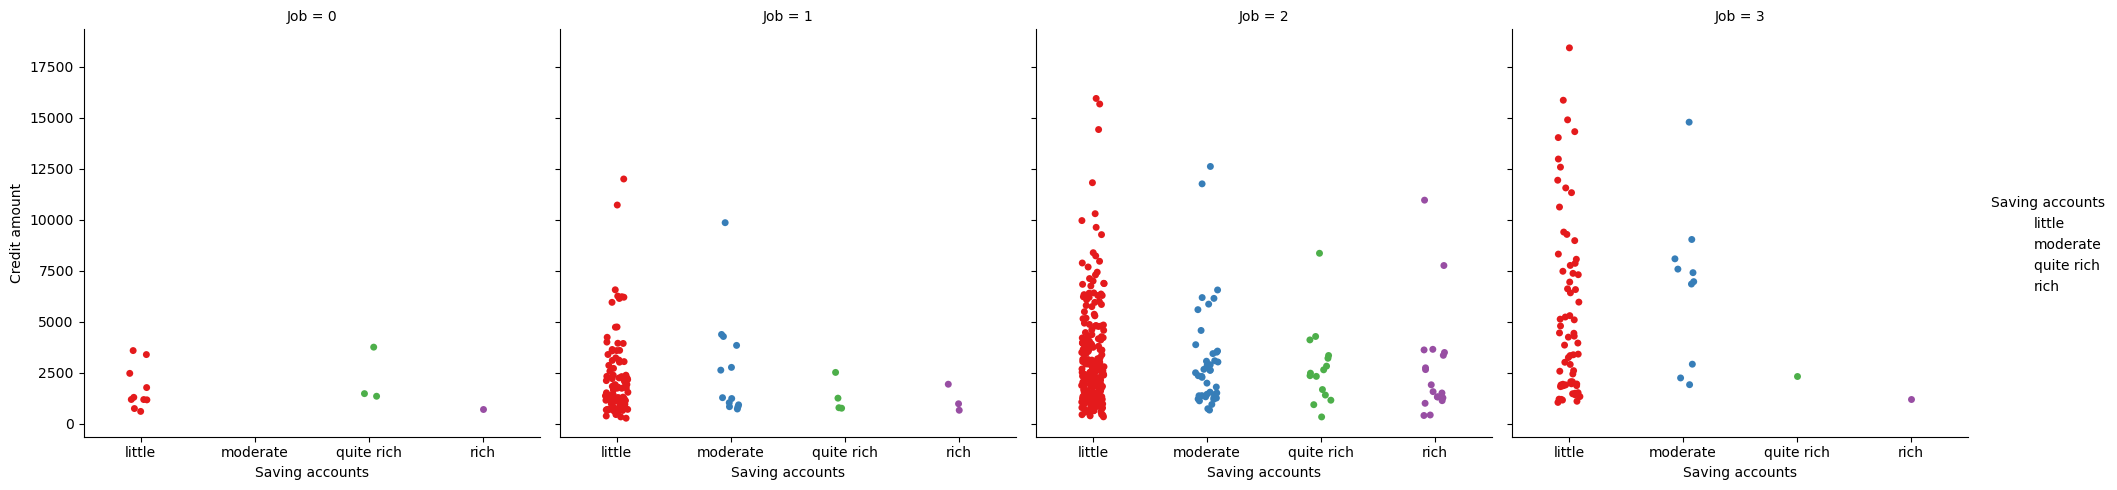

In [16]:
sns.catplot(x ='Saving accounts', y ='Credit amount', col = 'Job', data = data, kind = 'strip', palette='Set1')

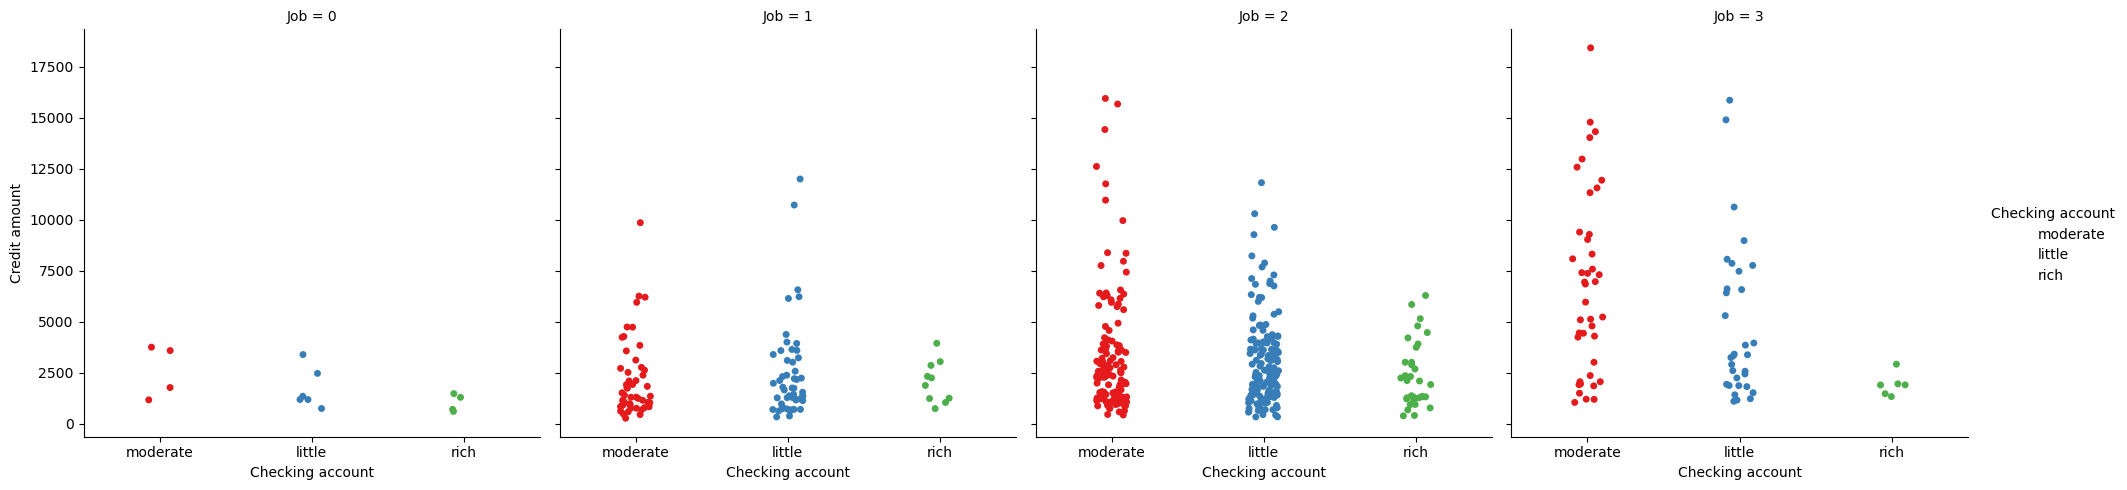

In [17]:
sns.catplot(x='Checking account', y='Credit amount', col = 'Job', data=data, kind = 'strip', palette='Set1')

Job (Работа):
0 – неквалифицированный и иногородний,
1 – неквалифицированный и постоянный,
2 – квалифицированный,
3 – высококвалифицированный

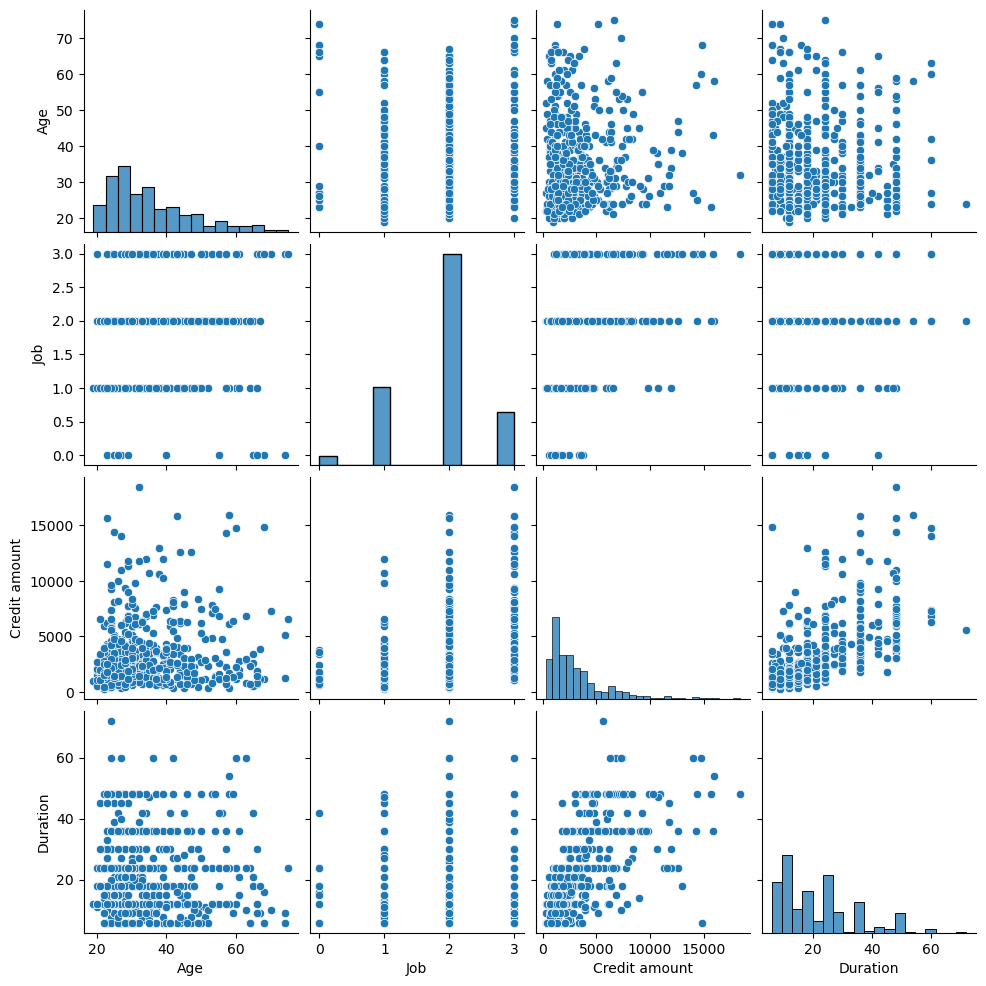

In [18]:
sns.pairplot(data)

### Корреляция

In [19]:
corr = data.corr()

In [20]:
mask = np.triu(np.ones_like(corr, dtype=bool))

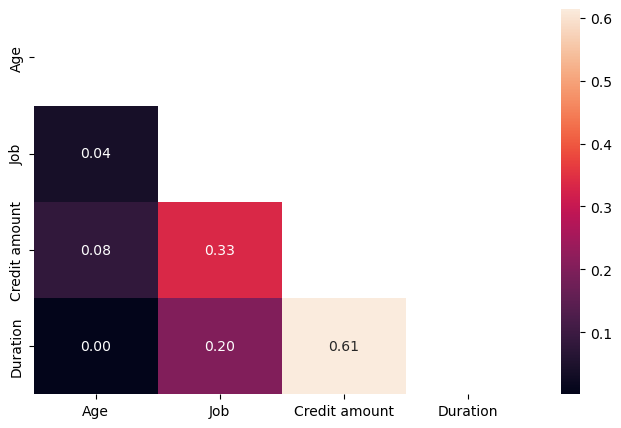

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

Предварительные выводы:
1. Портрет потребителя. Чаще всего кредит берут молодые люди 25-30 лет, квалифицированные работники (2), на сумму от 0 до 4000 марок, как правило на год, реже- на 2 года.
2. Прослеживается корреляция между суммой кредита и его продолжительностью

## 1.2.Препроцессинг

### Ordinary Encoder
Зададим функцию, которая кодирует категориальные признаки выбранным методом

In [22]:
def evaluate_encoding(data):
    # Здесь можно выполнить оценку качества кодирования
    # и возвратить результаты

    # Вернем пустой словарь для примера
    return {}

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']] = enc.fit_transform(data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])

In [24]:
data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']].nunique()

Sex                 2
Housing             3
Saving accounts     4
Checking account    3
Purpose             8
dtype: int64

In [25]:
results = {}  # Определение переменной results

In [26]:
results['Ordinal_encoding'] = evaluate_encoding(data)

In [27]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0


## 1.3.Приведите все данные к одному масштабу
(а заодно поясните, почему это необходимая операция при кластеризации).

Посмотрим данные до номализации

<Axes: >

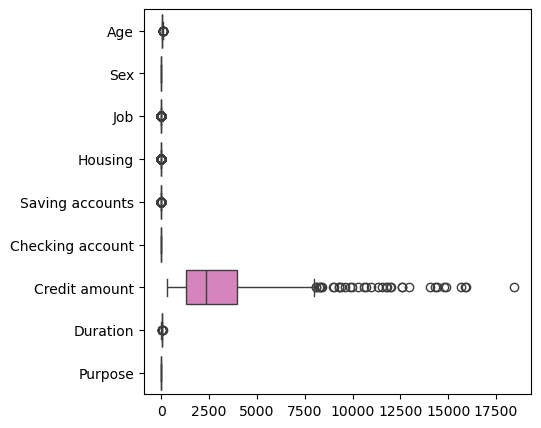

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data, orient='h')

### Вариант I: MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.053571,0.0,0.666667,0.5,0.0,0.5,0.312707,0.636364,0.714286
1,0.464286,1.0,0.666667,0.0,0.0,0.0,0.419110,0.545455,0.571429
2,0.607143,1.0,0.666667,0.0,0.0,0.0,0.253141,0.272727,0.142857
3,0.285714,1.0,1.000000,1.0,0.0,0.5,0.367644,0.454545,0.142857
4,0.160714,1.0,1.000000,0.5,0.0,0.5,0.273198,0.363636,0.142857


А теперь посмотрим данные после нормализации. Из boxplot-ов ниже видно, что размерность данных стала соизмерима. До номализации, значение 'Credit amount' было несоизмеримо больше остальных параметров.

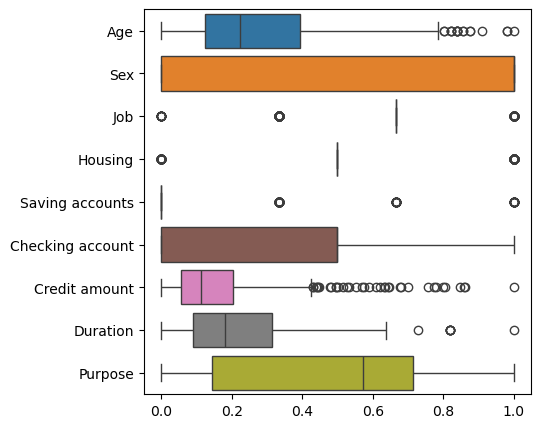

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_scaled, orient='h');

### Вариант II: StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_s = StandardScaler()
X_scaled_s = scaler_s.fit_transform(data)
data_scaled_s = pd.DataFrame(X_scaled_s, columns=data.columns)
data_scaled_s.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,-1.094447,-1.451600,0.18254,-0.144578,-0.451116,0.557302,0.913171,2.139356,1.063306
1,0.858575,0.688895,0.18254,-1.899688,-0.451116,-0.957863,1.573037,1.657897,0.561456
2,1.537887,0.688895,0.18254,-1.899688,-0.451116,-0.957863,0.543768,0.213521,-0.944093
3,0.009435,0.688895,1.64848,1.610532,-0.451116,0.557302,1.253868,1.176438,-0.944093
4,-0.584963,0.688895,1.64848,-0.144578,-0.451116,0.557302,0.668155,0.694979,-0.944093


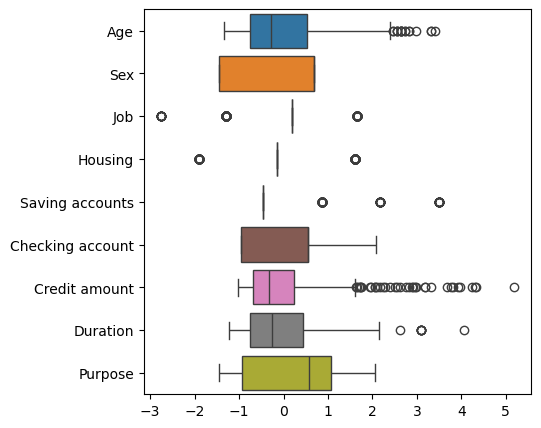

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_scaled_s, orient='h');

### Вариант III: RobustScaler

In [33]:
from sklearn.preprocessing import RobustScaler

scaler_r = RobustScaler()
X_scaled_r = scaler_r.fit_transform(data)
data_scaled_r = pd.DataFrame(X_scaled_r, columns=data.columns)
data_scaled_r.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,-0.633333,-1.0,0.0,0.0,0.0,0.0,1.355587,2.033898,0.25
1,0.900000,0.0,0.0,-1.0,0.0,-1.0,2.077793,1.627119,0.00
2,1.433333,0.0,0.0,-1.0,0.0,-1.0,0.951286,0.406780,-0.75
3,0.233333,0.0,1.0,1.0,0.0,0.0,1.728471,1.220339,-0.75
4,-0.233333,0.0,1.0,0.0,0.0,0.0,1.087424,0.813559,-0.75


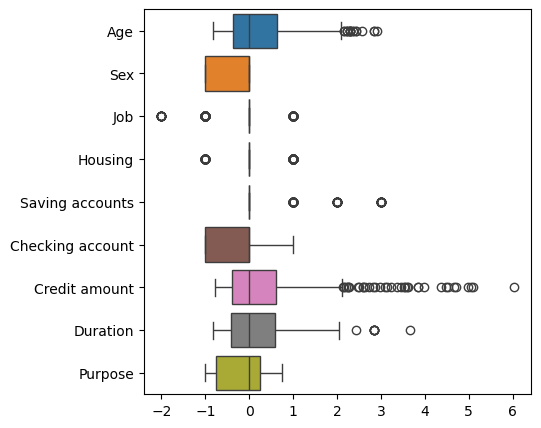

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_scaled_r, orient='h');

### наибольшую эффективность по номализации данных показал  RobustScaler. Я хочу исследовать как нормализация влияет на количество и качество кластеров. Поэтому вначале (вариант I) я применю MinMaxScaler. А потом (варинат II) StandardScaler. Результаты нормализации StandardScaler и RobustScaler, но StandardScaler более популярнный, поэтому я хочу исследовать именно его.

# Часть 2. Моделирование с MinMaxScaler

## 2.1. Снижение размерности для визуализации

### Метод t-SNE

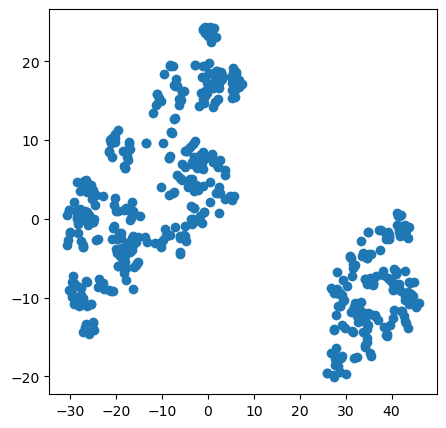

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
tsne_transformed = tsne.fit_transform(X_scaled)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1])
plt.show()

### Метод PCA для сжатия пространства до двух измерений

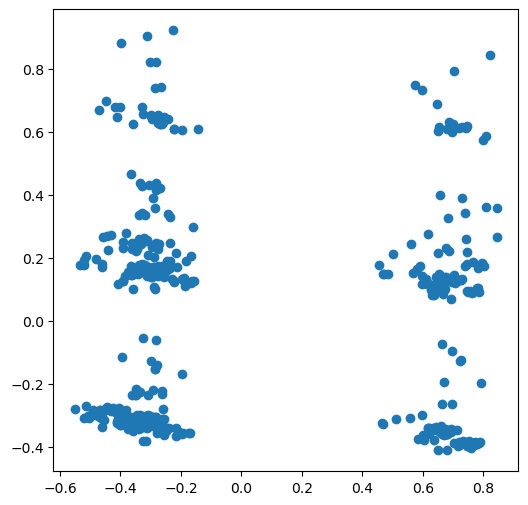

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1])
plt.show()

### Метод UMAP для сжатия пространства до двух измерений

In [36]:
# pip install umap-learn

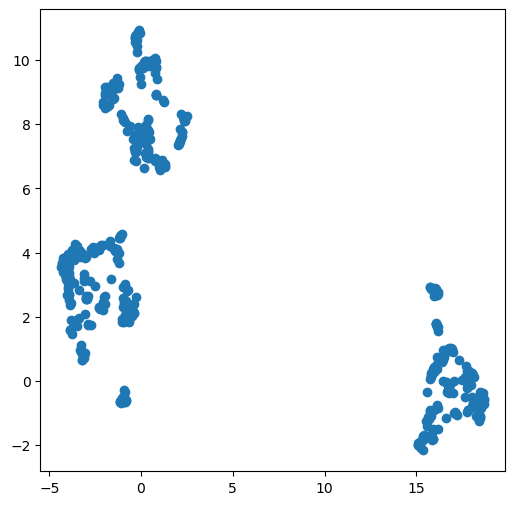

In [37]:
import umap
umap_transformed = umap.UMAP(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1])
plt.show()

### Выводы: Метод t-SNE показал 2 кластера, метод PCA - 6 малых или 2 объединеных кластера, метод UMAP - 3 кластера.

## 2.2. Построение трех вариантов кластеризации: k-means, hierarhical и DBSCAN, 
подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;

## 2.2.1.k-means (I способ)

In [38]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(data_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

Модели обучаем на полных данных, поэтому используем data_scaled

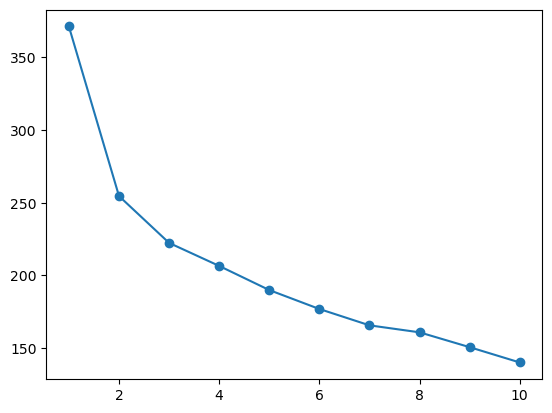

In [39]:
plt.plot(range(1,11), inertia, marker='o');

Метод локтя позволяет определить число кластеров. Но на данном графике нет четкого излома, Излом начинается с 2, но это может быть и 3,4,5,6. Для уточнения построим еще один график

In [40]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

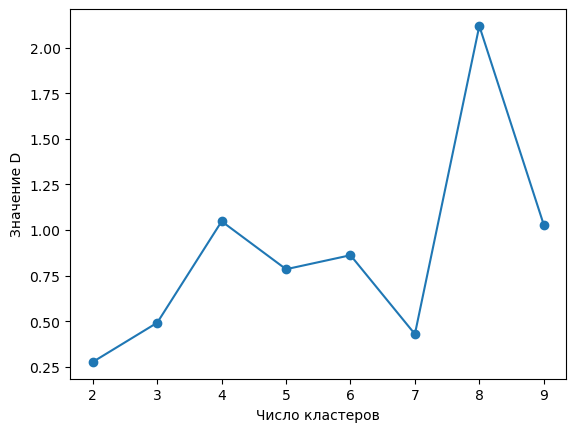

In [41]:
plt.plot(range(2,10), D, marker='o');
plt.xlabel("Число кластеров")
plt.ylabel("Значение D")
plt.show()

Чтобы определить оптимальное число кластеров, ищем точку, где значение D имеет самое минимальное значение.
В данном случае, это значение - 2. 

In [86]:
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(data_scaled)
labels = kmeans.labels_

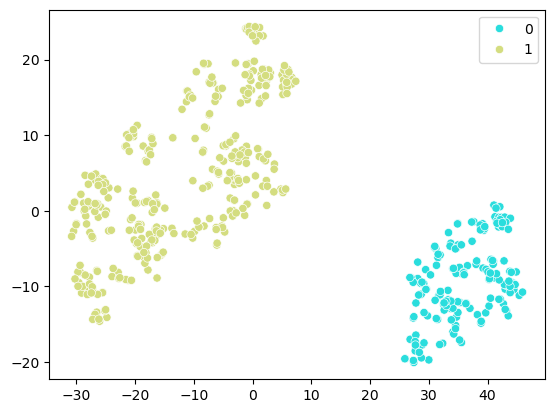

In [87]:
sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=labels, palette='rainbow');

In [89]:
# Для анализа мне нужна матрица data_kmeans['Cluster'], поэтому я ее создам здесь.
# data_kmeans = data.copy()
data_kmeans['Cluster'] = kmeans.labels_
data_kmeans.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels,Cluster
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0,0,0
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0,1,1
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0,1,1
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0,1,1
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0,1,1


In [90]:
data['labels'] = labels

In [91]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.321839
1    0.678161
Name: labels, dtype: float64

68% - кластер "1" и 32% - кластер "0"; 

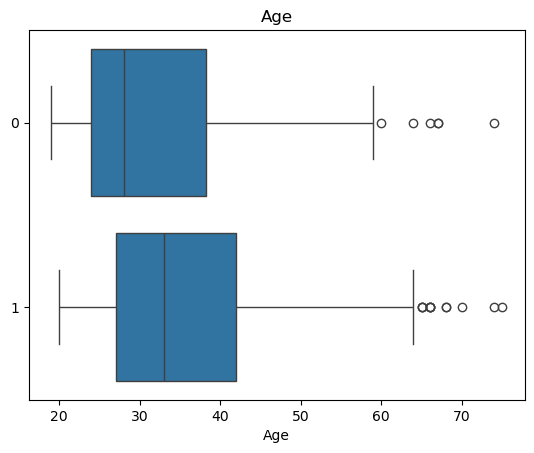

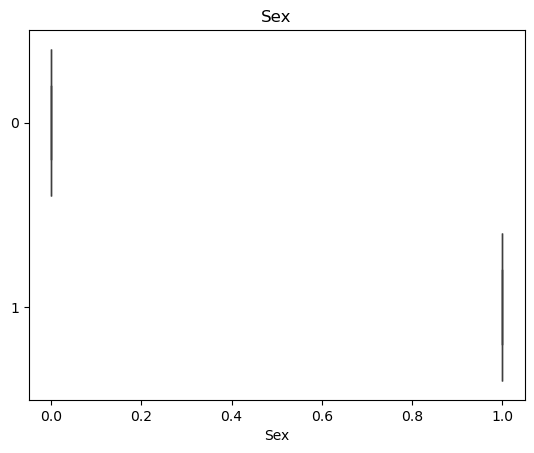

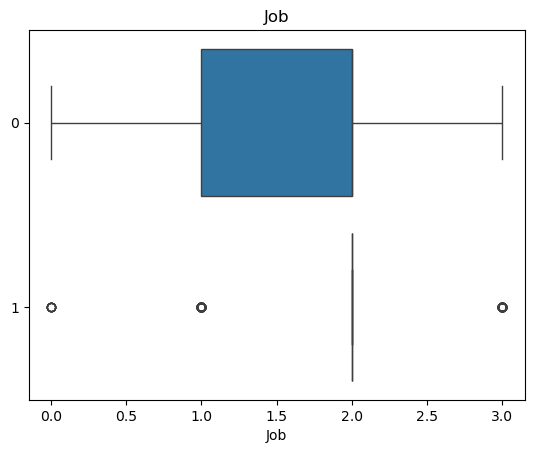

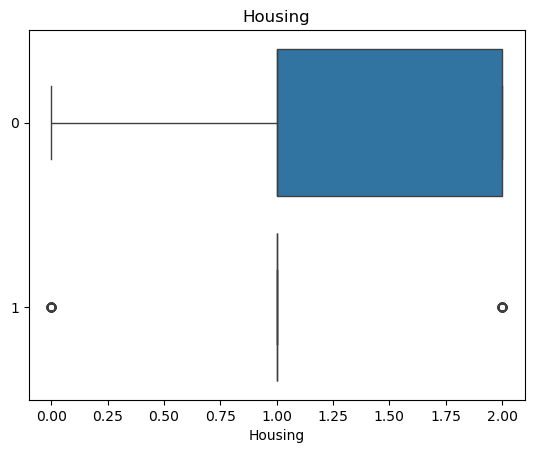

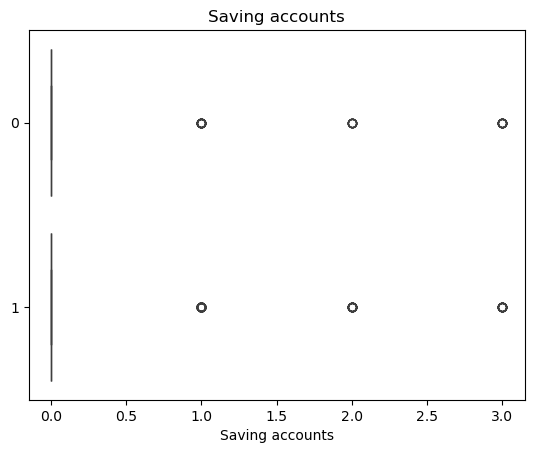

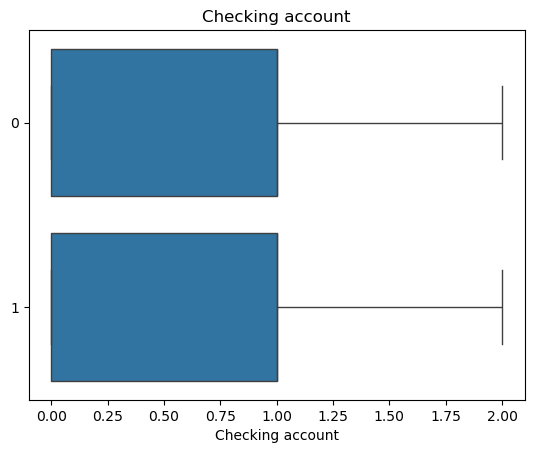

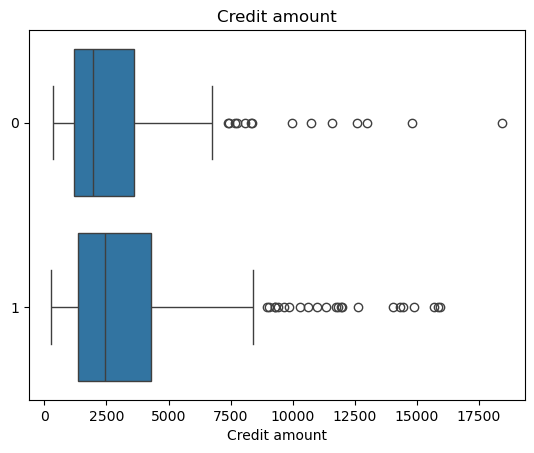

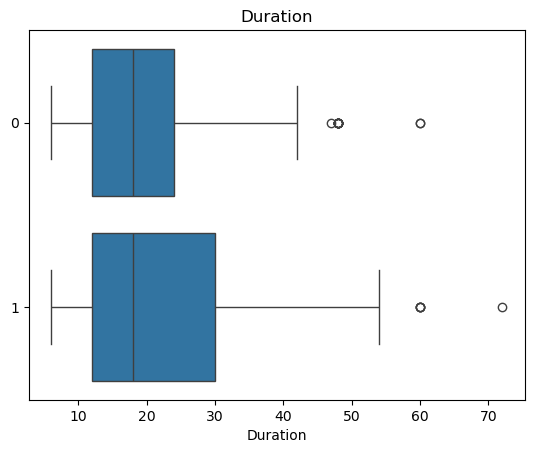

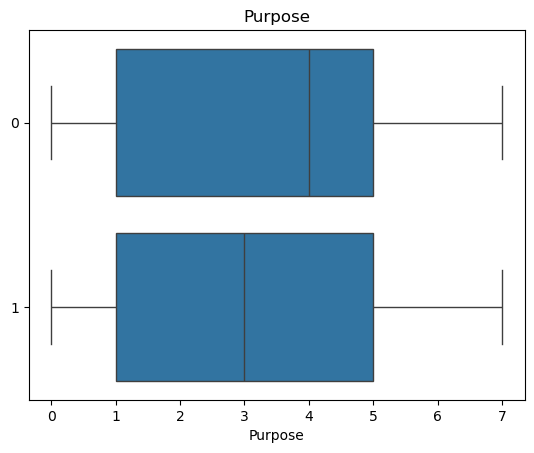

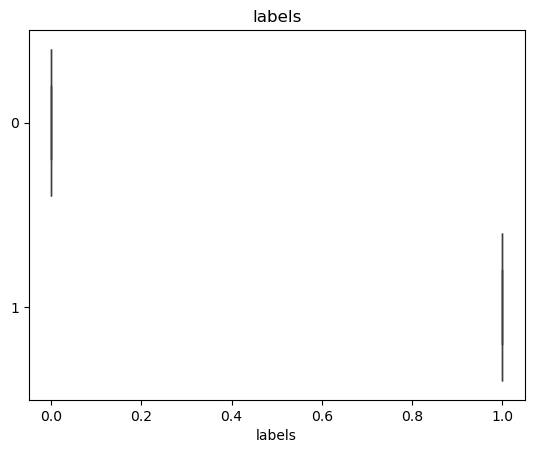

In [92]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [93]:
data.groupby('labels').median().T.round(2)

labels,0,1
Age,28.0,33.0
Sex,0.0,1.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Checking account,1.0,1.0
Credit amount,1959.0,2452.0
Duration,18.0,18.0
Purpose,4.0,3.0


In [94]:
columns_of_interest = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in data.columns[0:9]:
    if col in columns_of_interest:
        print(col, np.unique(data[col]))

Sex [0. 1.]
Job [0 1 2 3]
Housing [0. 1. 2.]
Saving accounts [0. 1. 2. 3.]
Checking account [0. 1. 2.]
Purpose [0. 1. 2. 3. 4. 5. 6. 7.]


#### Для анализа кластеров мне надо понять каким  качественным параметрам выбранных категорий ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'] какие числовые значения соответвуют. Я сделала это 2 способами. К сожалению, у меня оба способа вышли с ошибками, поэтому в дальнейшем я сверяла значения "в ручную".

#### Способ № 1: используем метод 'inverse_transform'  OrdinalEncoder

In [95]:
# Создаем экземпляр OrdinalEncoder и применяем его к нужным столбцам
enc = OrdinalEncoder()
qualitative_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
# print(data[qualitative_columns])

In [96]:
"""
encoded_data = enc.fit_transform(data[qualitative_columns])

# Создаем DataFrame для категорий и их числовых значений
categories_data = pd.DataFrame(encoded_data, columns=qualitative_columns)

# Выводим на печать категории и их числовые значения
for column in qualitative_columns:
    categories = enc.inverse_transform(categories_data[column])
    numerical_values = categories_data[column]
    print(column)
    for category, value in zip(categories, numerical_values):
        print(f'{category}: {value}')
    print()
"""

"\nencoded_data = enc.fit_transform(data[qualitative_columns])\n\n# Создаем DataFrame для категорий и их числовых значений\ncategories_data = pd.DataFrame(encoded_data, columns=qualitative_columns)\n\n# Выводим на печать категории и их числовые значения\nfor column in qualitative_columns:\n    categories = enc.inverse_transform(categories_data[column])\n    numerical_values = categories_data[column]\n    print(column)\n    for category, value in zip(categories, numerical_values):\n        print(f'{category}: {value}')\n    print()\n"

#### Способ № 2 Для выбранной категории Sex вывводим на печать параметр "female" и соответсвующеее ему численное значение

In [97]:
sex_data = pd.DataFrame(data['Sex'])

In [98]:
sex_data['labels'] = labels

In [99]:
sex_data[sex_data['Sex'] == 'female']

,Sex,labels


## 2.2.1.k-means (II способ) : автоматизированный поиск оптимального числа кластеров 

Best Num Clusters: 2


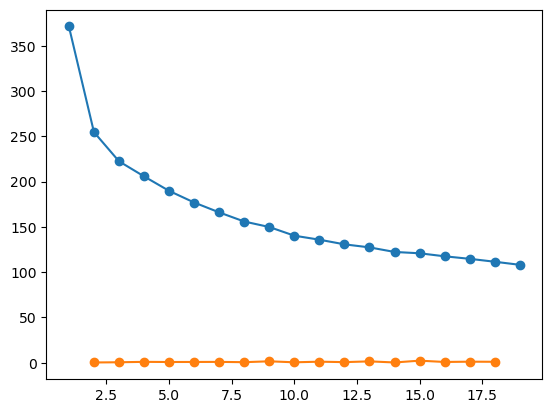

In [100]:
clusters = 20
inertia = []
for i in range(1,clusters):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=20).fit(data_scaled)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    
plt.plot(range(1,clusters), inertia, marker='o');

D = []
for i in range(1,clusters-2):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)
    
D_series = pd.Series(data=D, index=list(range(2,len(inertia))))
print(f'Best Num Clusters: {D_series.index[D_series.argmin()]}')
plt.plot(D_series, marker='o');

### Вывод: Результаты методы локтя и автоматизированного поиска в диапазоне от 1 до 20 кластеров показали идентичные результаты. 

## 2.2.2. Hierarhical /  AgglomerativeClustering

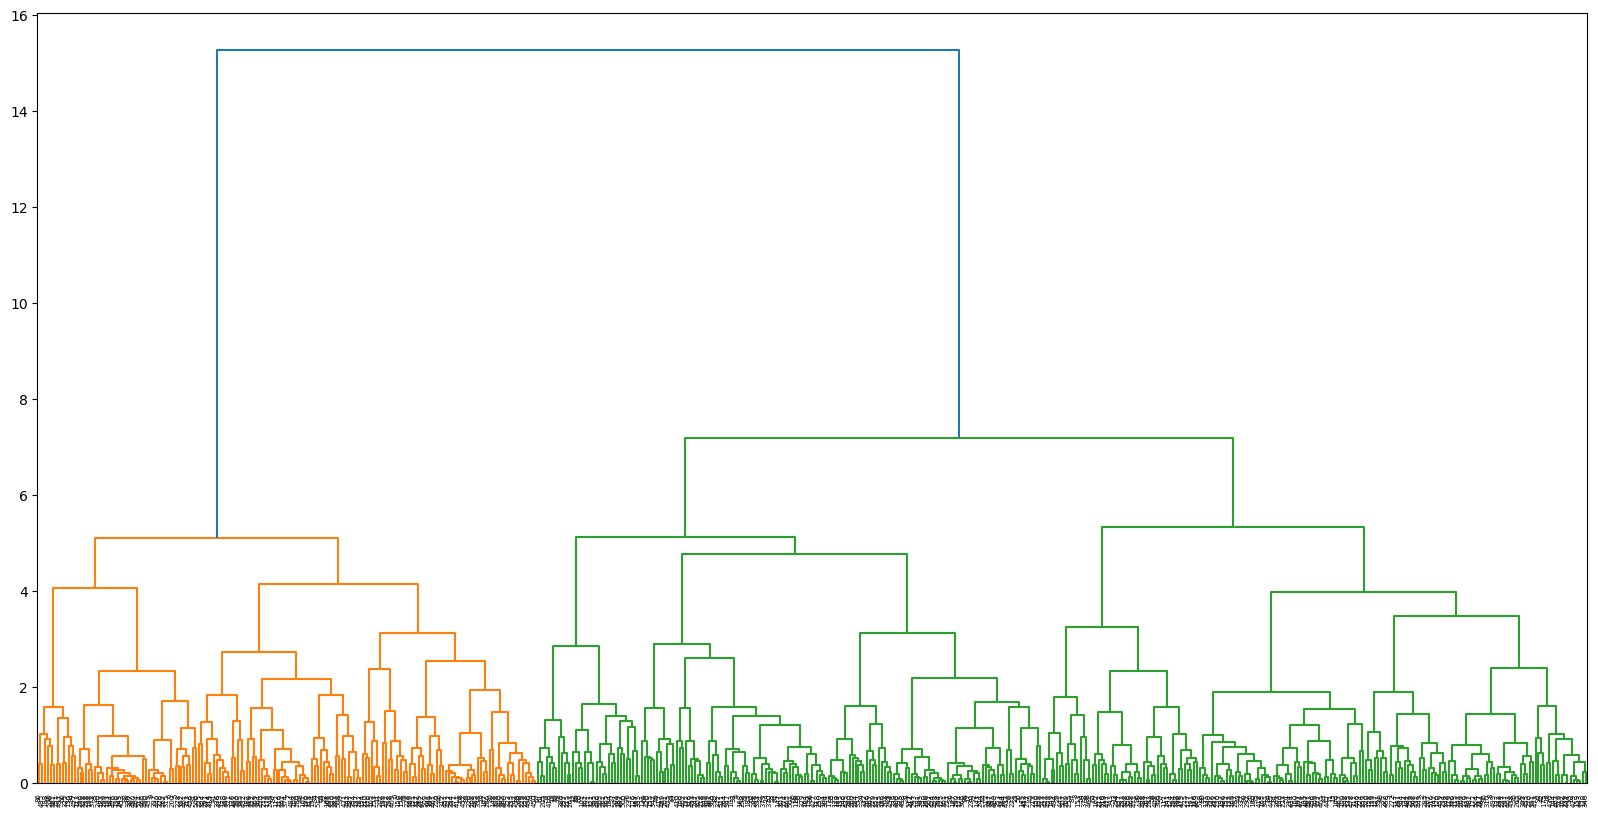

In [101]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

На дендрограмме мы видим, что расстояние резко увеличивается, после того, как число кластеров уменьшается до 2-х.

In [102]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(data_scaled)
    labels = agg.labels_
    score = silhouette_score(data_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 37.52it/s]


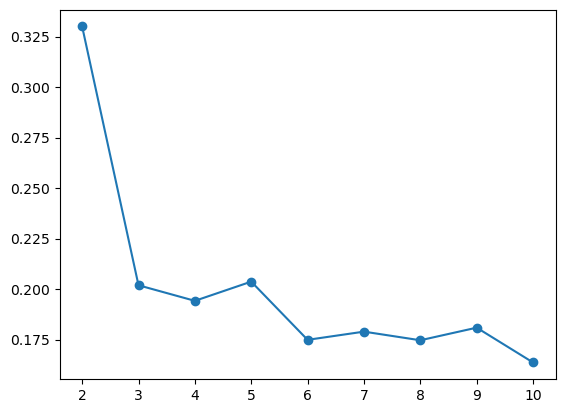

In [103]:
plt.plot(range(2,11), silhouette, marker='o');

In [104]:
agg = AgglomerativeClustering(n_clusters=2).fit(data_scaled)
# data_agg = data.copy()
data_agg['Cluster'] = agg.labels_
data_agg.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels,Cluster
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0,0,1
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0,1,0
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0,1,0
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0,1,0
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0,1,0


In [105]:
labels = agg.labels_
plot_data = pd.DataFrame(zip(tsne_transformed[:,0], tsne_transformed[:,1], labels), columns=['x', 'y', 'hue'])

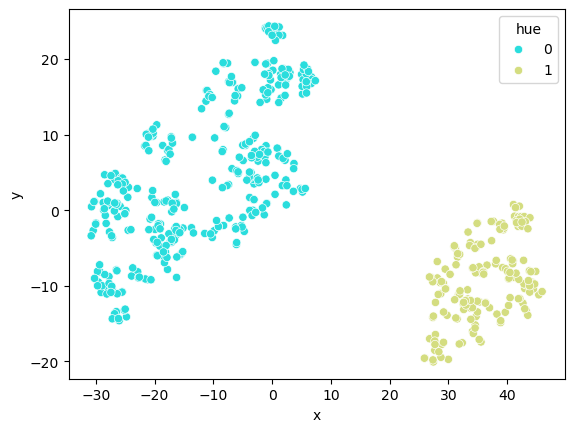

In [106]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='rainbow');

In [107]:
data['labels'] = labels

In [108]:
data['labels'].value_counts(normalize=True)

0    0.678161
1    0.321839
Name: labels, dtype: float64

68% - кластер "0" и 32% - кластер "1"; 

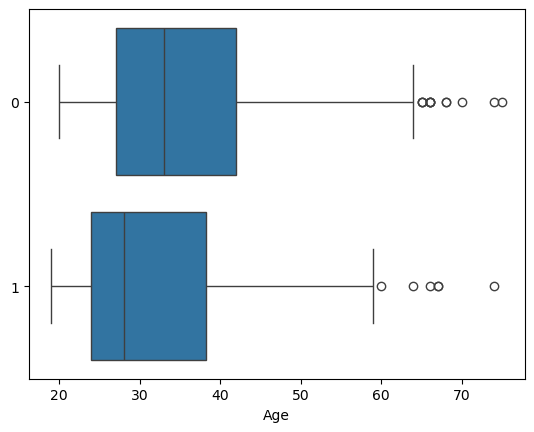

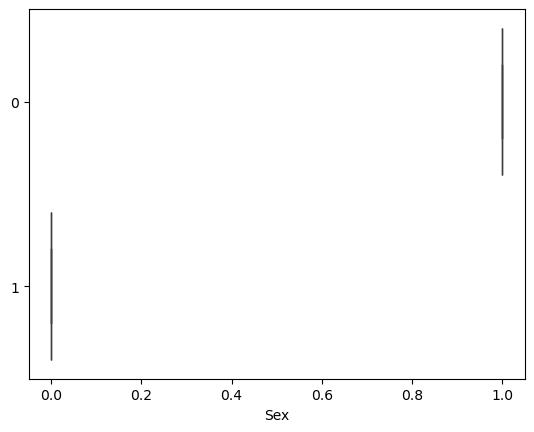

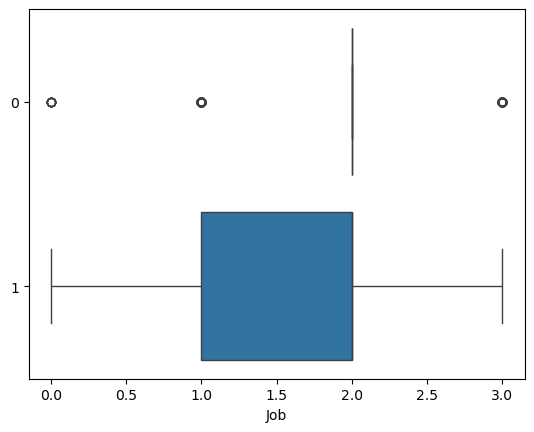

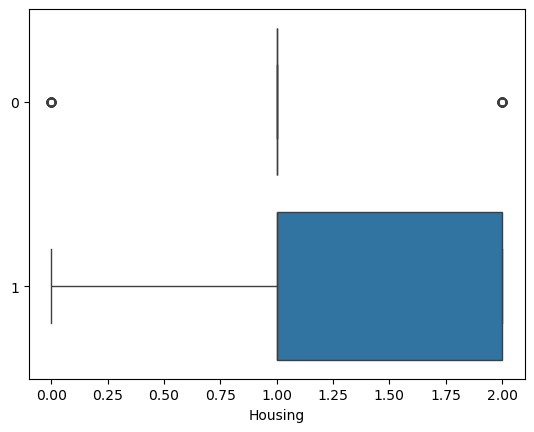

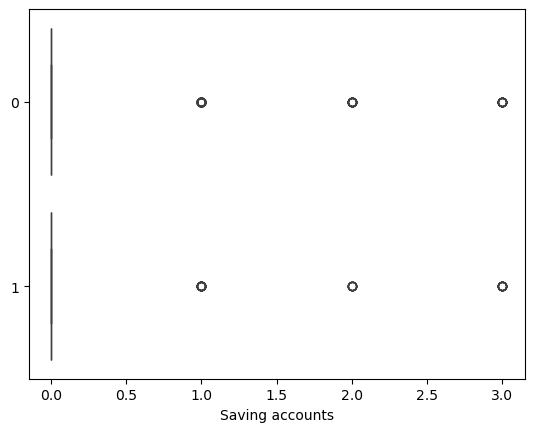

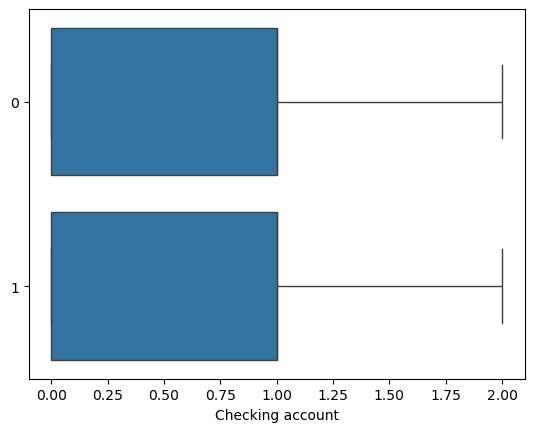

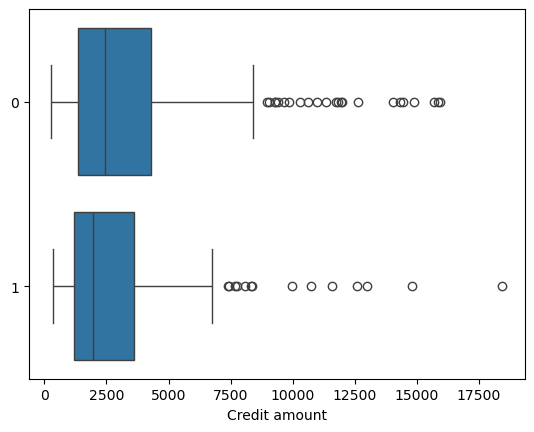

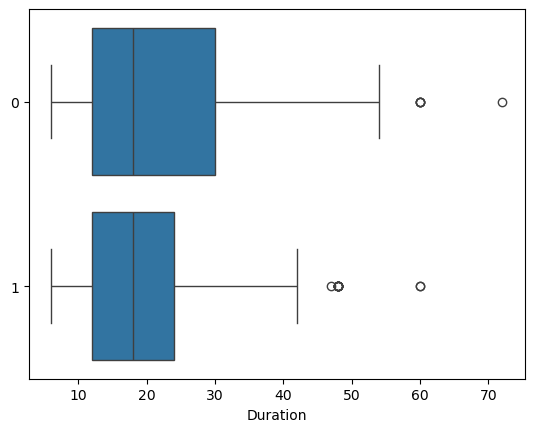

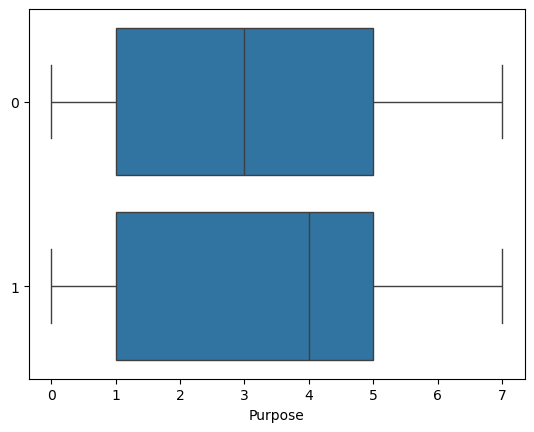

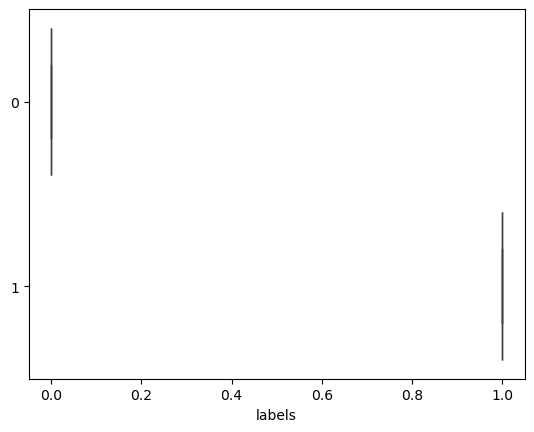

In [109]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

#### Статистика

In [110]:
data.groupby('labels').median().T.round(2)

labels,0,1
Age,33.0,28.0
Sex,1.0,0.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Checking account,1.0,1.0
Credit amount,2452.0,1959.0
Duration,18.0,18.0
Purpose,3.0,4.0


### Выводы: 
Поменялись названия кластеров: '0' стал '1'. 
Но портрет потребителя остался тот же, что и в методе k-means: статистика полностью совпала. В процентном соотношении кластеры тоже совпали 68:32

## 2.2.3. DBSCAN

#### Строим силуэтный коэффициент

In [111]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,2,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(data_scaled)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(data_scaled, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 39.04it/s]


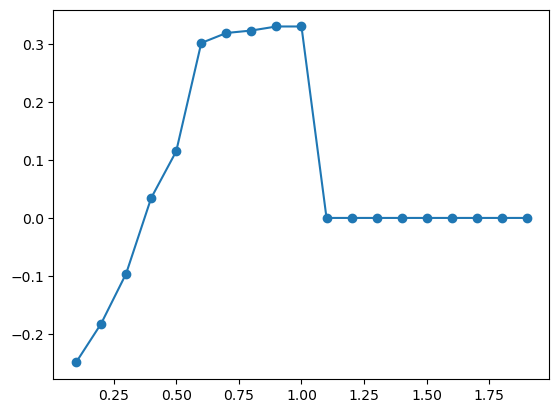

In [112]:
plt.plot(eps_range, silhouette, marker='o')

На графике: по оси Х - eps, по оси Y - силуэтный коээфициент, максимум которого достигается при eps равном от 0,8 до 1.

#### Строим диаграмму кластеров

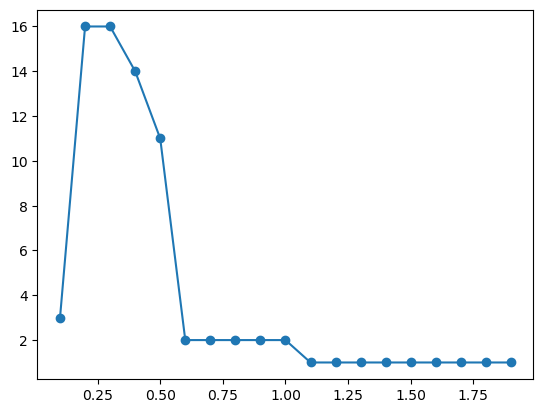

In [113]:
plt.plot(eps_range, clusters, marker='o')

На графике: по оси Х - eps, по оси Y- количество кластеров. Из диаграммы видно, что при eps=1, число кластеров =2.

#### Построим на одном графике два предудущих графика

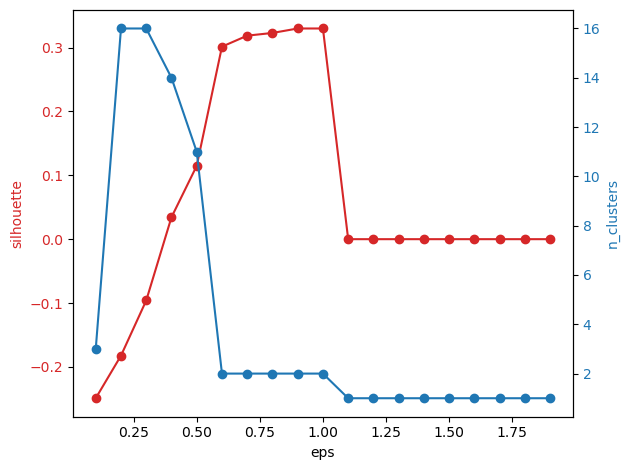

In [114]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # создаем вторую ось

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # чтобы правую y-label не обрезало
plt.show()

#### Рассмотрим промежуток eps от 0,8  до 1 более подробно

In [115]:
def dbscan_clustering(eps_range, data_scaled):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(data_scaled)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(data_scaled, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 25.35it/s]


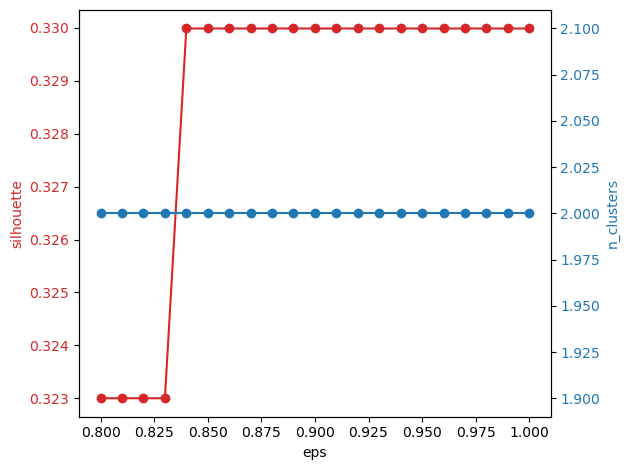

In [116]:
eps_range = np.arange(0.8,1.01,0.01)
dbscan_clustering(eps_range, data_scaled)

Из графика видно, что максимум силуэтного коэффициента наблюдается при eps равным от 0.84 до 1.01. Значит мы можем выбрать любой eps из этого промежутка.

Визуализируем DBSCAN с помощью t-sne и проверим как все строится

In [117]:
dbscan = DBSCAN(eps=0.95).fit(data_scaled)
labels = dbscan.labels_
# data_dbscan = data.copy()
data_dbscan['Cluster'] = dbscan.labels_
data_dbscan.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels,Cluster
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0,1,0
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0,0,1
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0,0,1
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0,0,1
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0,0,1


In [118]:
plot_data = pd.DataFrame(zip(tsne_transformed[:,0], tsne_transformed[:,1], labels), columns=['x', 'y', 'hue'])

<Axes: xlabel='x', ylabel='y'>

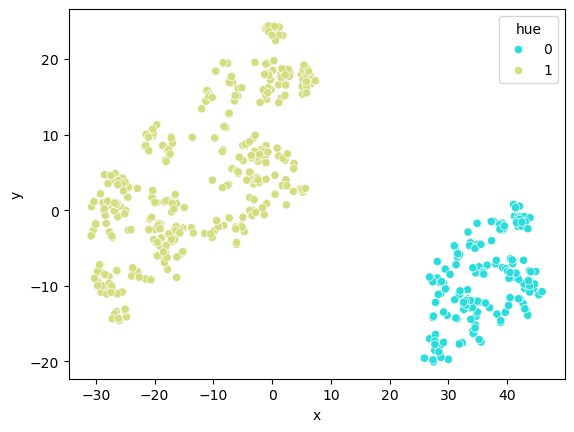

In [119]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='rainbow')

Мы видим два ярко выраженных класса и даже нет никаких выбросов.

In [120]:
data['labels'] = labels

In [121]:
data['labels'].value_counts(normalize=True)

1    0.678161
0    0.321839
Name: labels, dtype: float64

68% - кластер "1" и 32% - кластер "0"; 

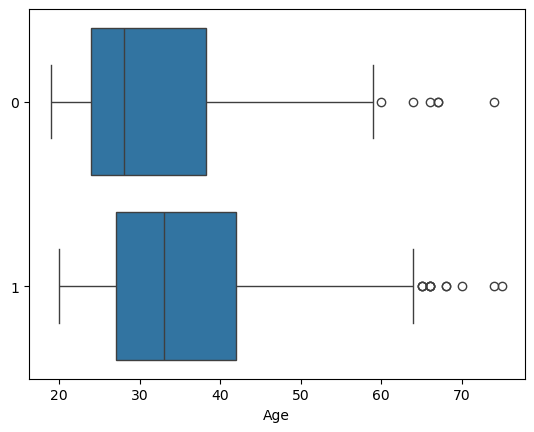

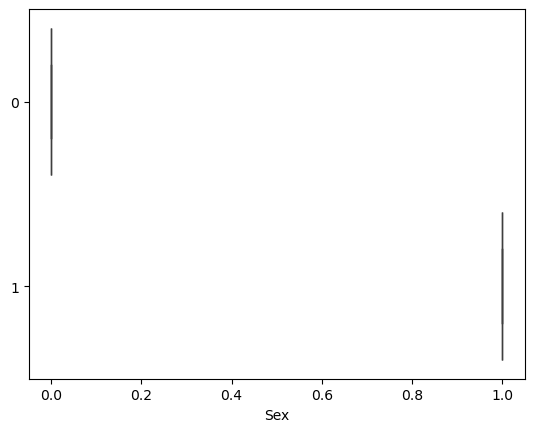

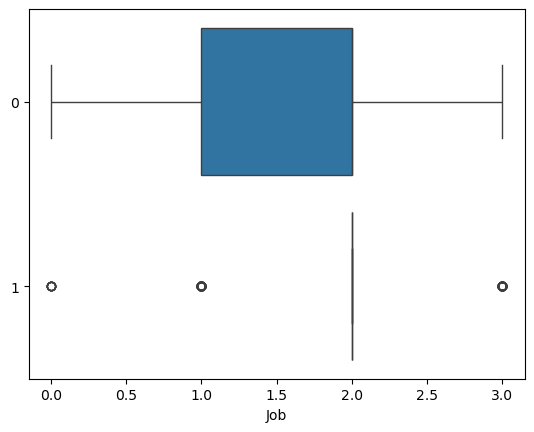

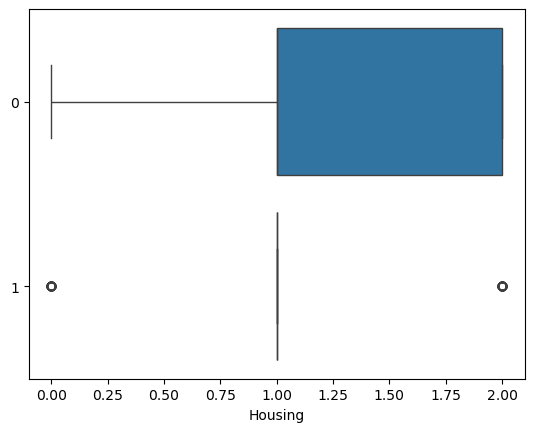

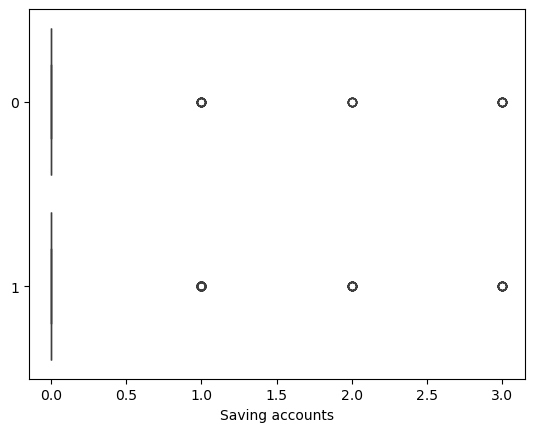

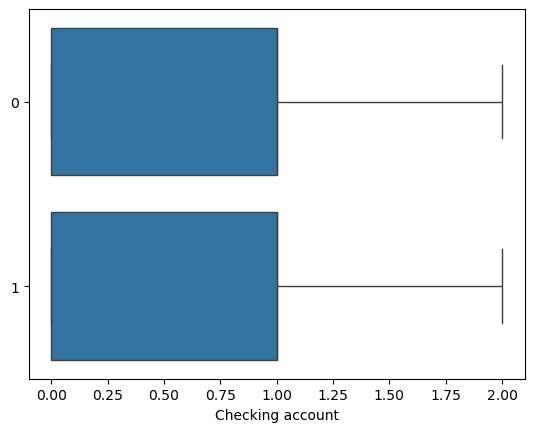

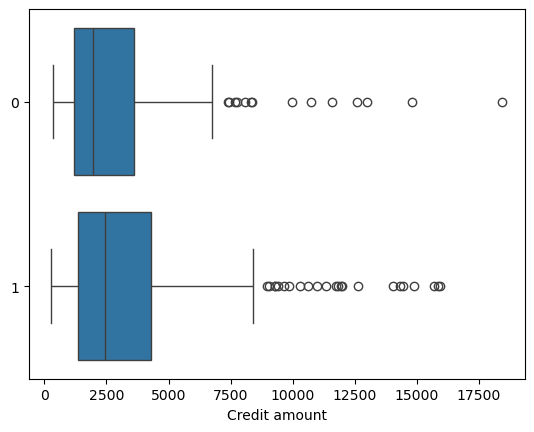

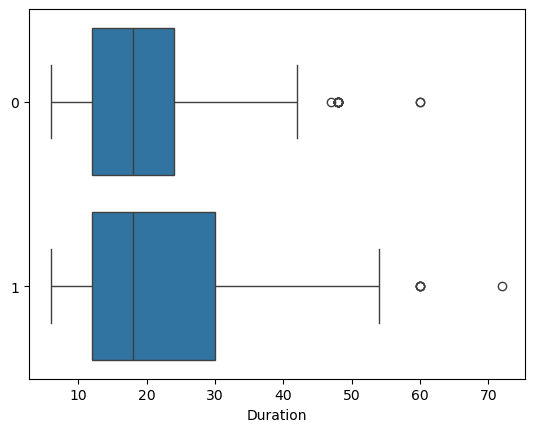

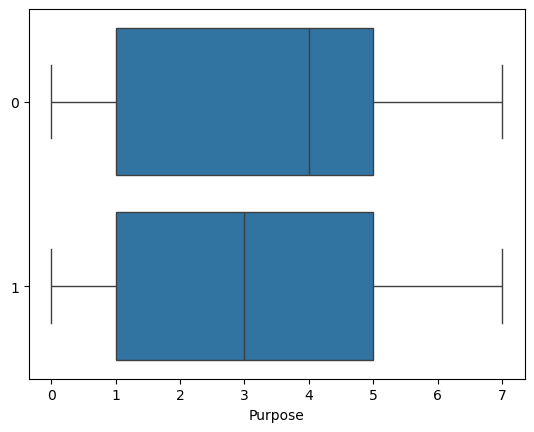

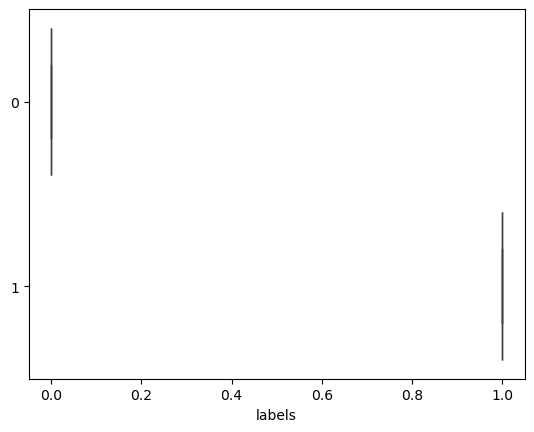

In [122]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

#### Посмотрим статистику

In [123]:
data.groupby('labels').median().T.round(2)

labels,0,1
Age,28.0,33.0
Sex,0.0,1.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Checking account,1.0,1.0
Credit amount,1959.0,2452.0
Duration,18.0,18.0
Purpose,4.0,3.0


# Часть 3. Выводы и интерпретация результатов исследований

### 3.1 Анализ среднего значения в кластерах
был проведен выше для всех методов

Все методы K-means, Hierarhical и DBSCAN показали совершенно одинаковые результаты (статистику, соотношение кластеров)

### 3.2 Визуализация кластеров

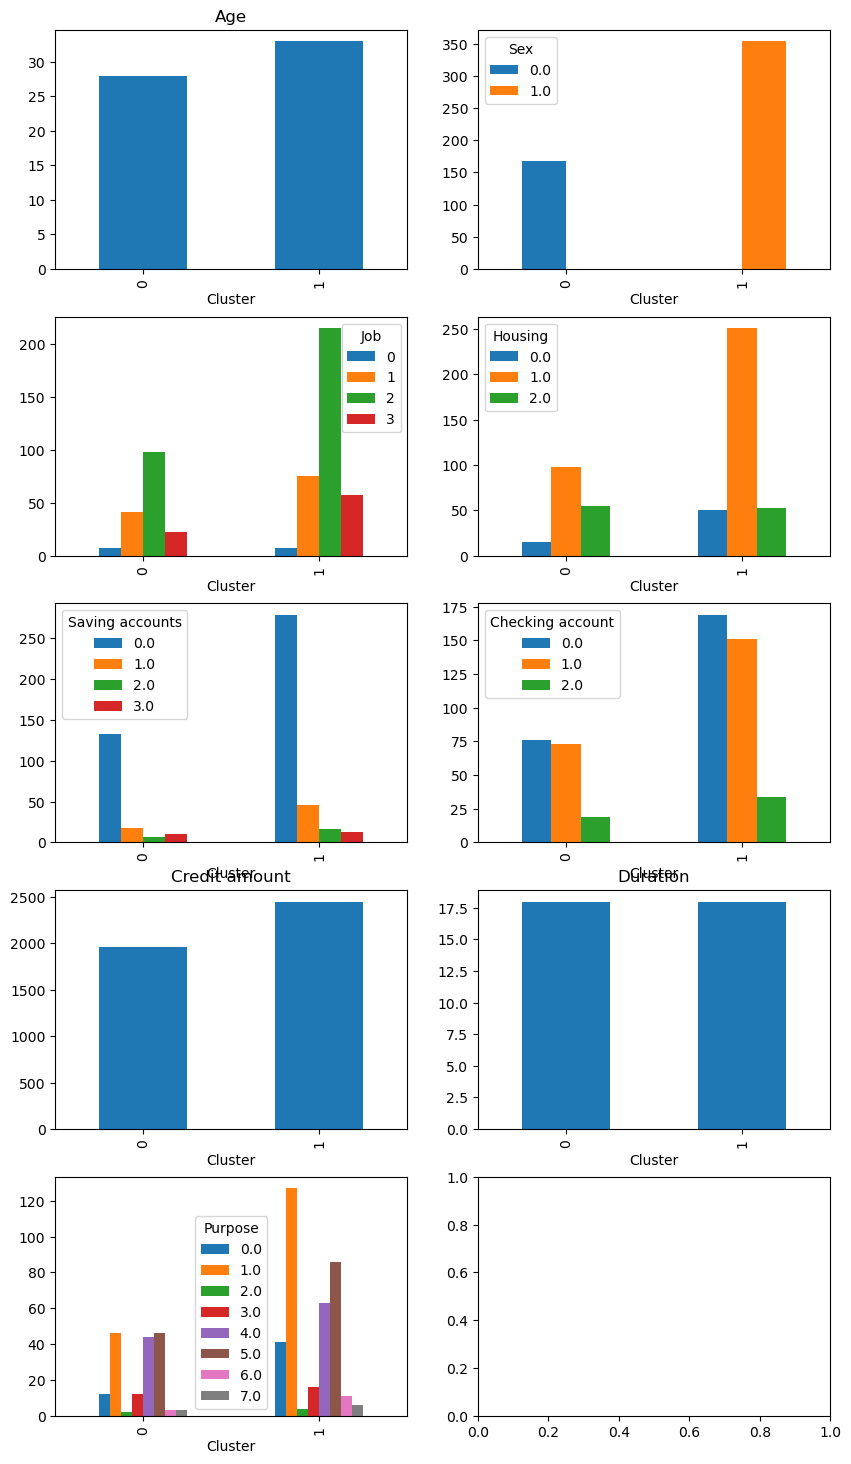

In [125]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,18))
data_kmeans.groupby(['Cluster']).median()['Age'].plot(kind='bar', ax=axs[0, 0])
data_kmeans.groupby(['Cluster', 'Sex']).size().unstack().plot(kind='bar', ax=axs[0, 1])
data_kmeans.groupby(['Cluster', 'Job']).size().unstack().plot(kind='bar', ax=axs[1, 0])
data_kmeans.groupby(['Cluster', 'Housing']).size().unstack().plot(kind='bar', ax=axs[1, 1])
data_kmeans.groupby(['Cluster', 'Saving accounts']).size().unstack().plot(kind='bar', ax=axs[2, 0])
data_kmeans.groupby(['Cluster', 'Checking account']).size().unstack().plot(kind='bar', ax=axs[2, 1])
data_kmeans.groupby(['Cluster']).median()['Credit amount'].plot(kind='bar', ax=axs[3, 0])
data_kmeans.groupby(['Cluster']).median()['Duration'].plot(kind='bar', ax=axs[3, 1])
data_kmeans.groupby(['Cluster', 'Purpose']).size().unstack().plot(kind='bar', ax=axs[4, 0])

axs[0, 0].set_title('Age')
axs[3, 0].set_title('Credit amount')
axs[3, 1].set_title('Duration')

plt.show()

# Выводы

1.**Кластер "0" (Женский кластер) Портрет потребителя:**

Женщинский гендер, возраст - чуть младше 30 лет (медианное значение 28 лет), квалифицированный специалист, имеющая собственное жилье, с малой суммой денег на сберегательном вкладе, со средней суммой денег на текущем счету, с кредитом около 2000 нем.марок продолжительностью 1,5 года, взятым на технику/мебель. 

**Кластер "1" (Мужской кластер) Портрет потребителя:**

Мужской гендер, чуть старше 30 лет (медианное значение 33 года), квалифицированный специалист, имеющий собственное жилье, с малой суммой денег на сберегательном вкладе, со средней суммой денег на текущем счету, с кредитом около 2500 нем.марок продолжительностью 1,5 года, взятым на образование.

Сообношение людей в кластерах: Женский кластер - 32%, Мужской кластер - 68%. Такое разбиение закономерно, потому что в анализируемой выборке мужчин в 2,1 раза больше, чем женщин.

2. Если кластеры сравнивать между собой, то они не сильно отличаются. Отличия состоят в том, что: 1) женщины берут кредит на чуть меньшую сумму - около 2000 нем. марок, в то время как мужчины берут 2500 нем. марок, 2) они тратят его на покупку мебели/техники, а мужчины - на образование, 3) медианный возраст женщин 28 лет, а у мужчин - 33 года.

3. Женский кластер в 2,1 раза меньше, чему мужской, то есть женщины в 2,1 раза берут кредит реже, чем мужчины.Это может быть связано с тем, что: 1) это природа женского поведения (более осторожные), 2) условия кредита не подходят женщинам.

Примеры, когда условия/товар не подходили женщинам: 
- автомобили. Были черные, без сервиса и женщины покупали их редко. Появились яркие цветные автомобили и мастерские по их ремонту, и женщины стали их покупать намного чаще. 
- когда появилсь детские сады и ясли женщины массово пошли на работу, потому что появились условия для этого.

Я полагаю, что изменив условия выдачи кредита можно увеличить число заинтересованных женщин в 2 раза. Например, женщины более осторожны и бояться, что не успеют во время отдать кредит. Предлагаю для женщин увеличить срок выдачи кредитов, при этом оставив ту же кредитную ставку. Кажется, что это не выгодно банку. Однако это может быть не так. Часто менее ответсвенные люди не отдают кредиты и банки теряют эти деньги. Если в кластере женщин не будет таких потерь, то затраты на увеличение времени возврата кредита окупятся. Но это надо считать, на сколько можно увеличить время возврата кредита без ущерба для банка.

4. Выводы по нормализации Продолжение работы в файле HW_Prof_2_1